In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))  # Adjust if your notebook is nested deeper

from src.data_preprocessing import load_data, preprocess_data


In [48]:
data = load_data('../data/raw/MachineLearningRating_v3.txt')
data = preprocess_data(data)

Initial data shape: (1000098, 52)

Missing values (%):
 NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
Converted                   64.183810
Rebuilt                     64.183810
WrittenOff                  64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
Model                        0.055195
make                         0.055195
VehicleType                  0.055195
mmcode                       0.055195
bodytype                     0.055195
CapitalOutstanding           0.000200
dtype: float64

Dropping columns with >60% missing values: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 


Correlation Matrix (numeric features only):
                          UnderwrittenCoverID  PolicyID  IsVATRegistered  \
UnderwrittenCoverID                  1.000000  0.916324         0.020841   
PolicyID                             0.916324  1.000000         0.033664   
IsVATRegistered                      0.020841  0.033664         1.000000   
PostalCode                          -0.018263 -0.034269        -0.037951   
mmcode                               0.083349  0.074437        -0.205460   
RegistrationYear                     0.065930  0.067254        -0.010403   
Cylinders                           -0.026928 -0.028556         0.033339   
cubiccapacity                        0.084948  0.088096        -0.047220   
kilowatts                           -0.038489 -0.032127        -0.044610   
NumberOfDoors                       -0.023782 -0.031433         0.013666   
SumInsured                           0.003022  0.002141         0.001628   
CalculatedPremiumPerTerm             0.0280

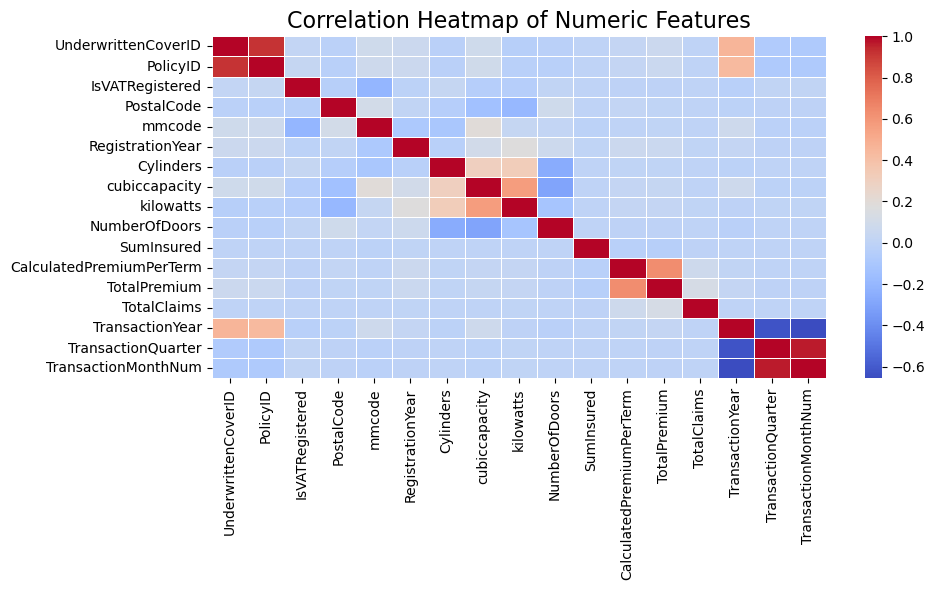

In [49]:
# Step 1: Compute the correlation matrix (numeric columns only)
correlation_matrix = data.corr(numeric_only=True)

# Step 2: Display the correlation matrix in numbers
print("\nCorrelation Matrix (numeric features only):")
print(correlation_matrix)

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [53]:
from src.exploratory_data_analysis import compute_loss_ratio,plot_loss_ratio_by,univariate_analysis, outlier_detection,temporal_trend,vehicle_claims_analysis,correlation_analysis


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

def compute_loss_ratio(data):
    premiums = data['TotalPremium'].replace(0, pd.NA)
    data['LossRatio'] = data['TotalClaims'] / premiums
    return data['LossRatio'].mean(skipna=True)

def plot_loss_ratio_by(data, column):
    if 'LossRatio' not in data.columns:
        data['LossRatio'] = data['TotalClaims'] / data['TotalPremium']
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='LossRatio', data=data)
    plt.title(f'Loss Ratio by {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def univariate_analysis(data):
    numeric_cols = ['TotalClaims', 'TotalPremium', 'CustomValueEstimate']
    cols_to_plot = [col for col in numeric_cols if col in data.columns]
    
    for col in cols_to_plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

def outlier_detection(data):
    numeric_cols = ['TotalClaims', 'CustomValueEstimate', 'SumInsured']
    cols_to_plot = [col for col in numeric_cols if col in data.columns]
    
    for col in cols_to_plot:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Outlier Detection for {col}')
        plt.tight_layout()
        plt.show()

def temporal_trend(data):
    monthly = data.groupby('TransactionMonth').agg({
        'TotalClaims': 'sum',
        'TotalPremium': 'sum',
        'PolicyID': 'count'
    }).rename(columns={'PolicyID': 'NumPolicies'}).reset_index()

    monthly['LossRatio'] = monthly['TotalClaims'] / monthly['TotalPremium']

    fig, axs = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

    sns.lineplot(data=monthly, x='TransactionMonth', y='TotalClaims', ax=axs[0])
    axs[0].set_title('Monthly Total Claims')

    sns.lineplot(data=monthly, x='TransactionMonth', y='TotalPremium', ax=axs[1])
    axs[1].set_title('Monthly Total Premium')

    sns.lineplot(data=monthly, x='TransactionMonth', y='LossRatio', ax=axs[2])
    axs[2].set_title('Monthly Loss Ratio')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def vehicle_claims_analysis(data):
    grouped = data.groupby(['make', 'Model'])['TotalClaims'].sum().sort_values()
    
    print("Top 10 Models with Lowest Total Claims:\n", grouped.head(10))
    print("\nTop 10 Models with Highest Total Claims:\n", grouped.tail(10))

    plt.figure(figsize=(12, 6))
    grouped.tail(10).plot(kind='barh', color='coral')
    plt.title('Top 10 Vehicle Make/Models by Total Claims')
    plt.xlabel('Total Claims')
    plt.tight_layout()
    plt.show()

def correlation_analysis(data):
    plt.figure(figsize=(12, 10))
    numeric_cols = data.select_dtypes(include='number')
    corr = numeric_cols.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()


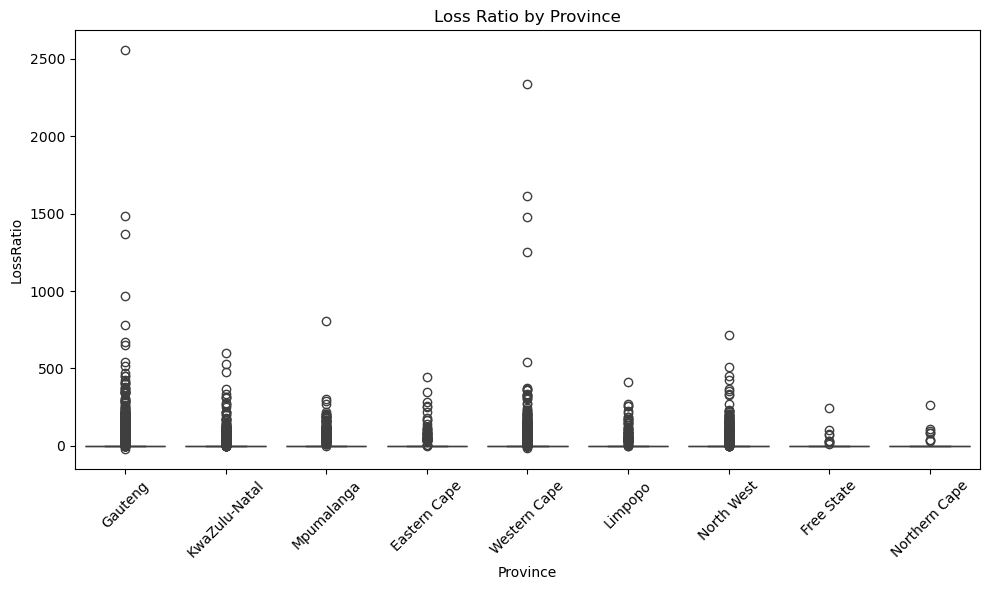

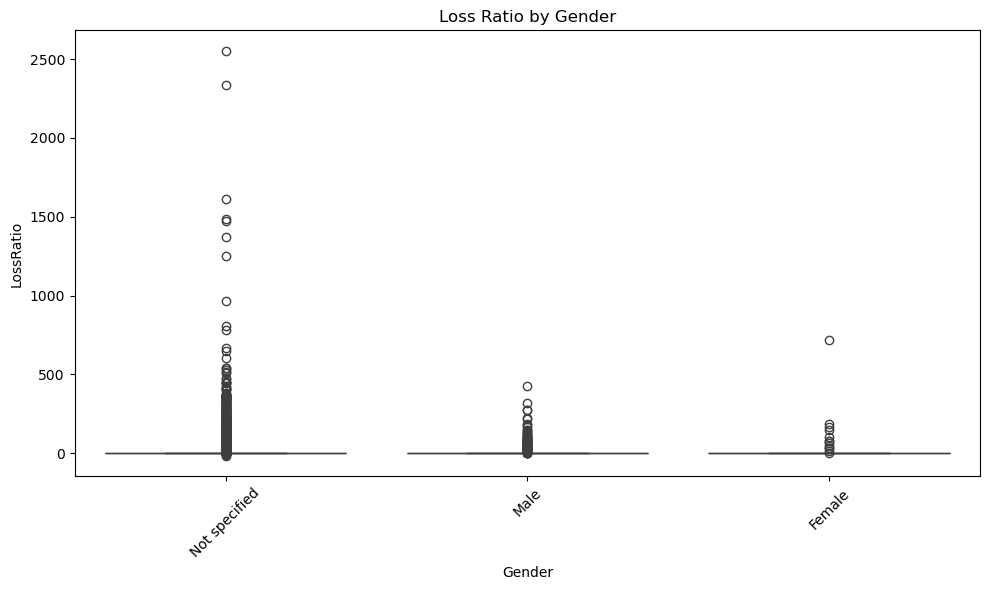

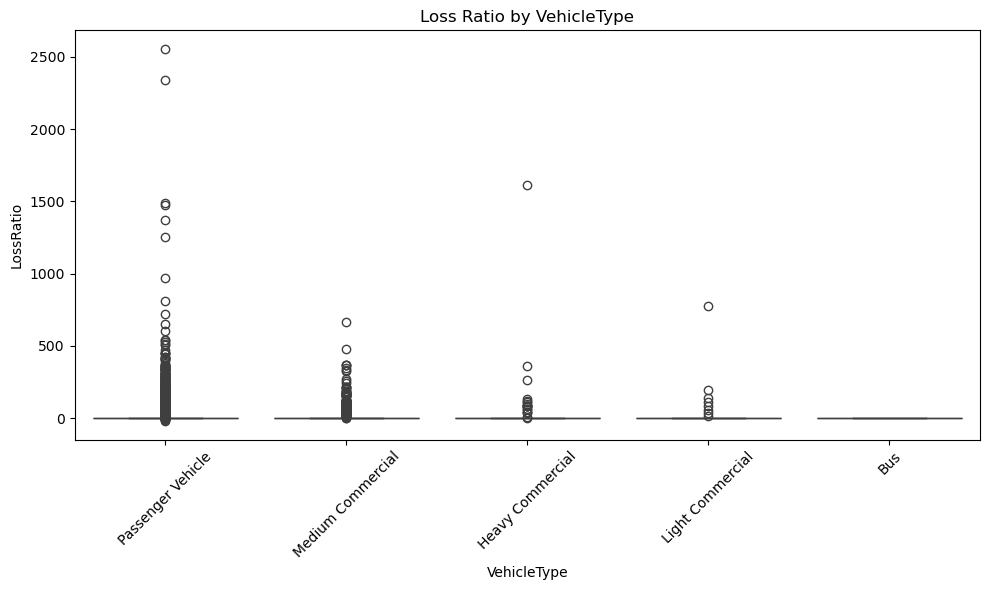

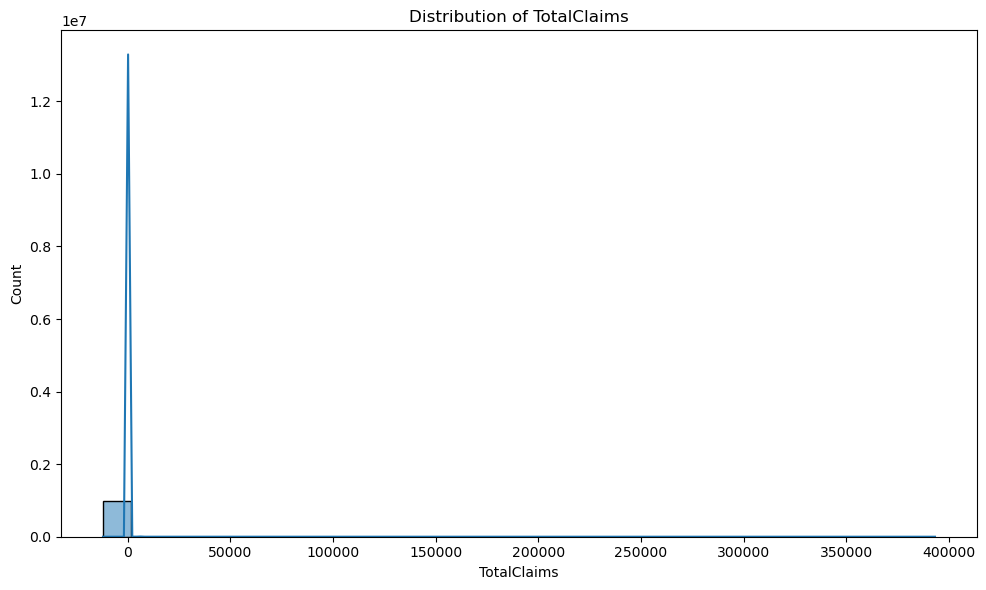

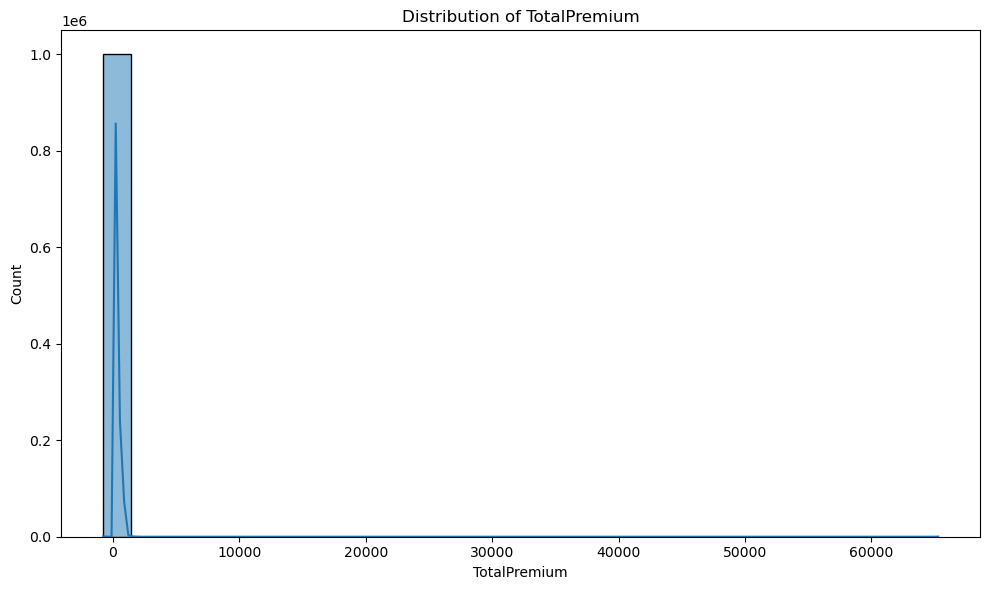

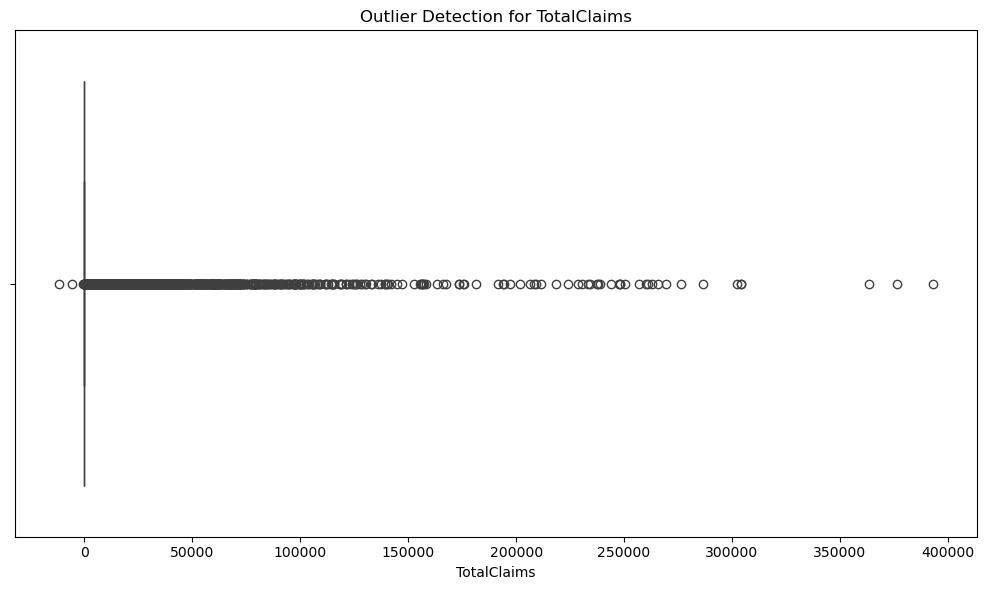

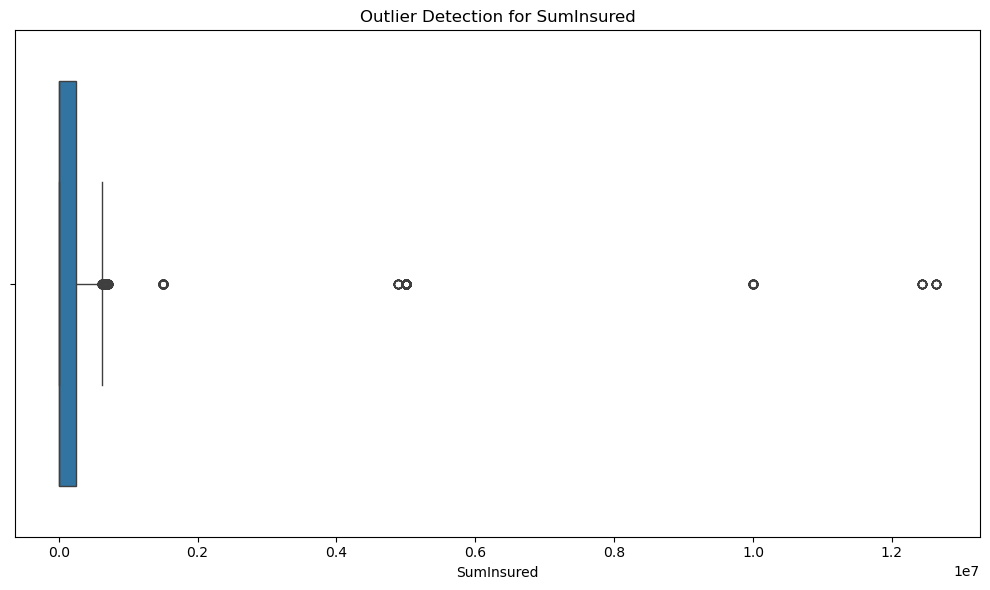

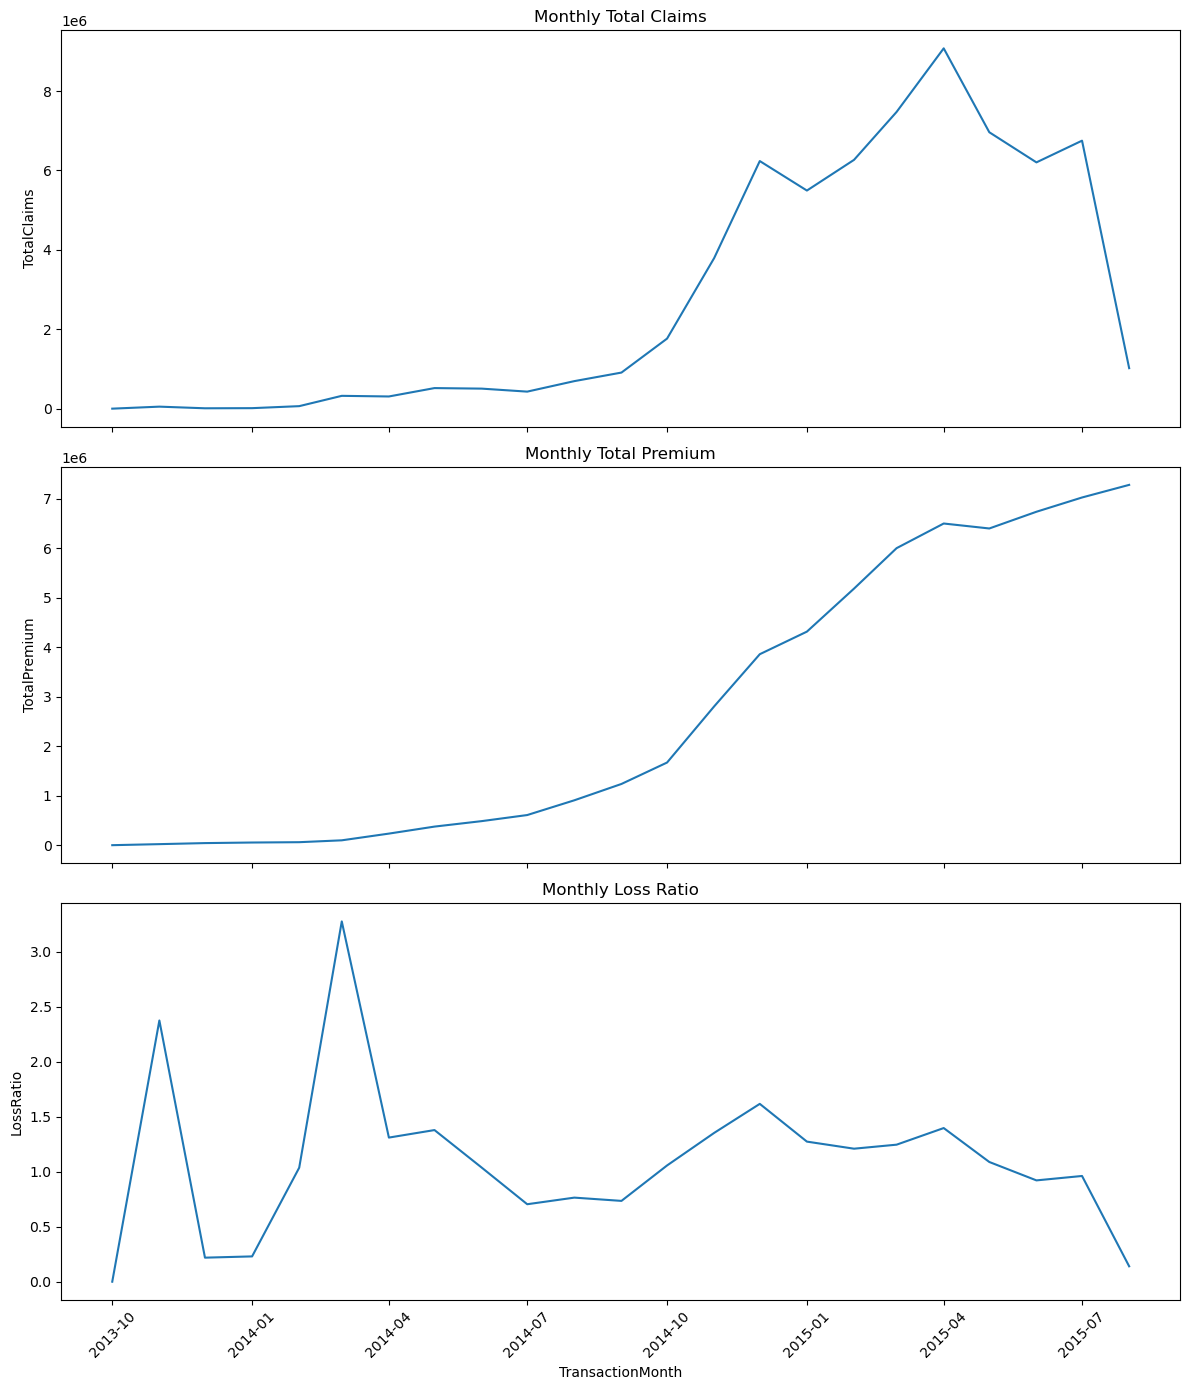

Top 10 Models with Lowest Total Claims:
 make                                 Model                     
MERCEDES-BENZ                        C200K CLASSIC A/T            -256.35
MITSUBISHI                           SPACEGEAR GLX                   0.00
TATA                                 INDICA 1.4 DLS                  0.00
SUZUKI                               SWIFT 1.2 GL A/T                0.00
                                     ERTIGA 1.4 GLX                  0.00
SCANIA                               P230 DB MSZ F/C C/C             0.00
                                     P 94LA 4X2 NA T/T C/C           0.00
                                     F94 MARCO POLO BUS B/S B/S      0.00
RENAULT                              SCENIC II AUTHENTIQUE 1.6       0.00
                                     SCENIC 1.9 dCi EXPRESSION       0.00
Name: TotalClaims, dtype: float64

Top 10 Models with Highest Total Claims:
 make           Model                           
MERCEDES-BENZ  SPRINTER 515 CD

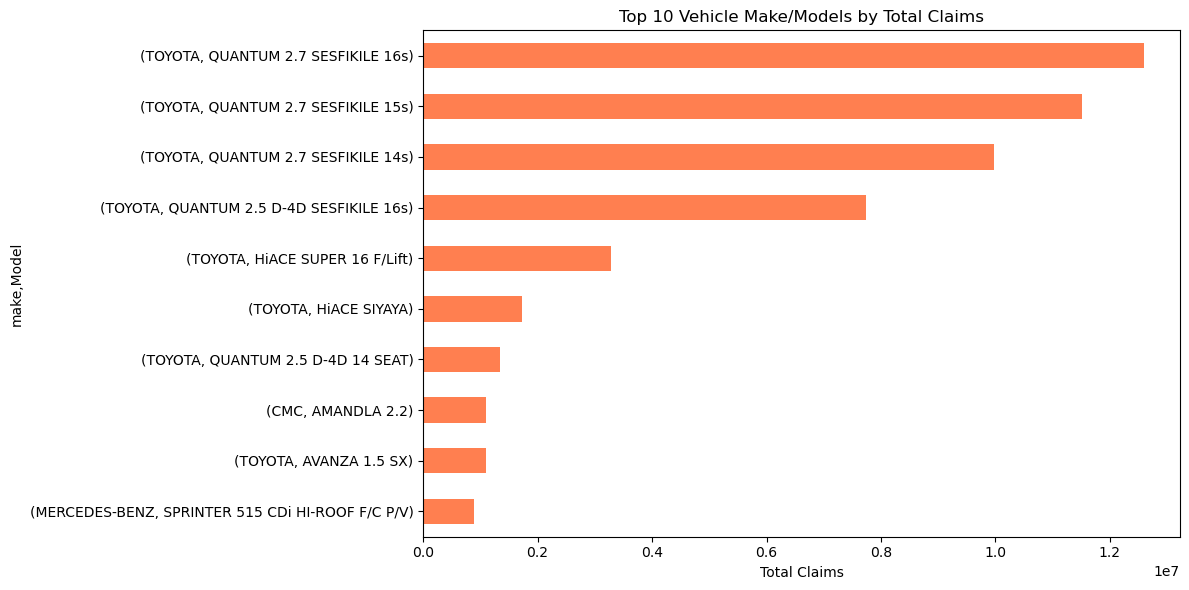

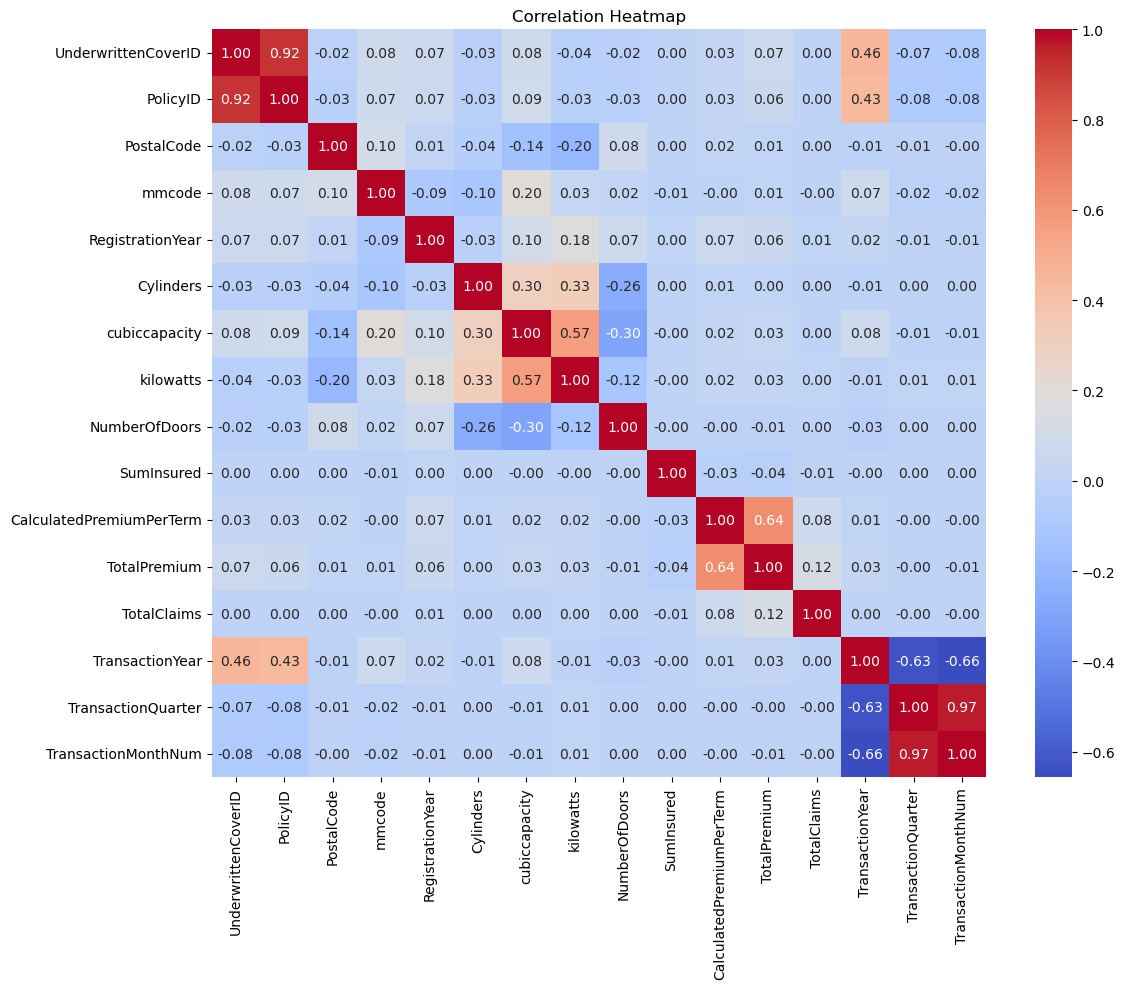

In [57]:
compute_loss_ratio(data)
    # Loss Ratio by categories
plot_loss_ratio_by(data, 'Province')
plot_loss_ratio_by(data, 'Gender')
plot_loss_ratio_by(data, 'VehicleType')

    # Univariate + Outlier
univariate_analysis(data)
outlier_detection(data)

    # Temporal trend
temporal_trend(data)

    # Vehicle analysis
vehicle_claims_analysis(data)

    # Correlation
correlation_analysis(data)